In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data= pd.read_csv('kyphosis.csv')
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


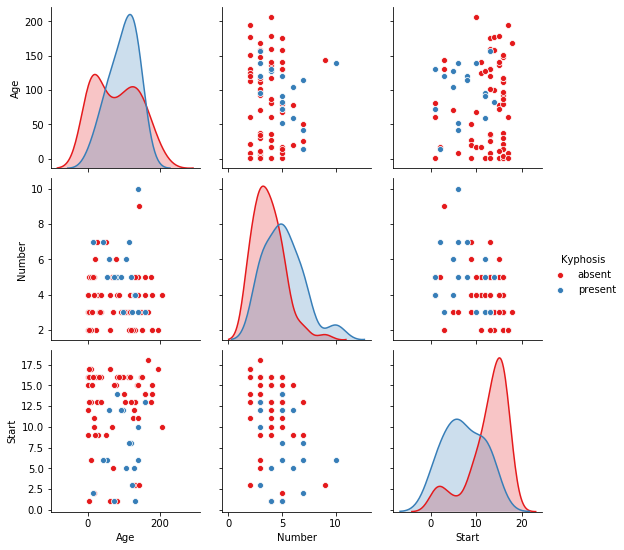

In [3]:
sns.pairplot(data,hue='Kyphosis',palette='Set1')

In [5]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(data.drop('Kyphosis',axis=1),data['Kyphosis'],test_size=0.33)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
tree = DecisionTreeClassifier()

In [19]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
ypredict = tree.predict(X_test)

In [21]:
tree.score(X_test,Y_test)

0.7037037037037037

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(Y_test,ypredict))

              precision    recall  f1-score   support

      absent       0.74      0.89      0.81        19
     present       0.50      0.25      0.33         8

    accuracy                           0.70        27
   macro avg       0.62      0.57      0.57        27
weighted avg       0.67      0.70      0.67        27



In [24]:
print(confusion_matrix(Y_test,ypredict))


[[17  2]
 [ 6  2]]


In [28]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(data.columns[1:])
features

['Age', 'Number', 'Start']

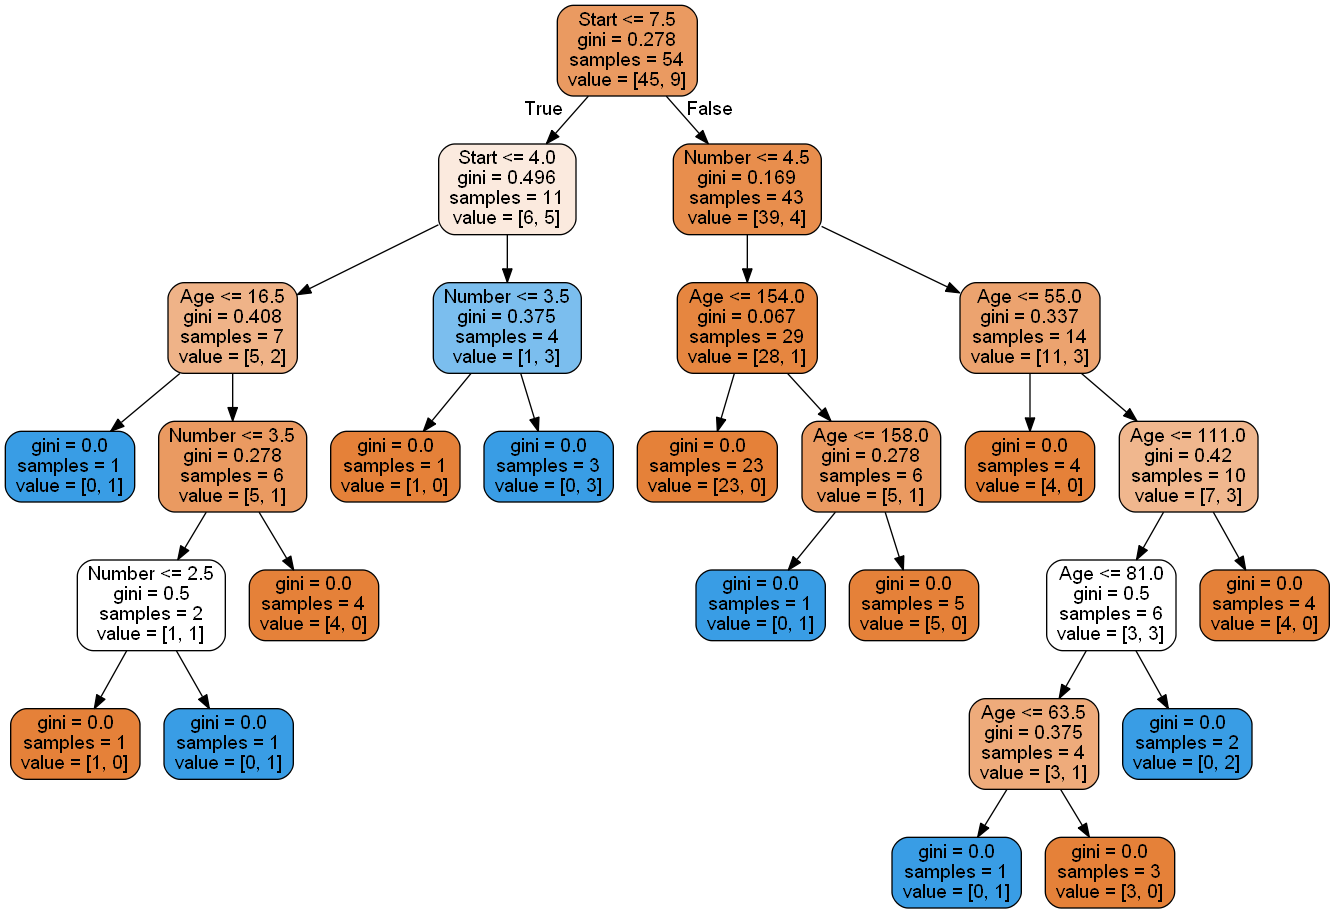

In [29]:
dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)
ypredict= rfc.predict(X_test)

In [32]:
rfc.score(X_test,Y_test)

0.7407407407407407

In [33]:
print(confusion_matrix(Y_test,ypredict))

[[19  0]
 [ 7  1]]


In [34]:
print(classification_report(Y_test,ypredict))

              precision    recall  f1-score   support

      absent       0.73      1.00      0.84        19
     present       1.00      0.12      0.22         8

    accuracy                           0.74        27
   macro avg       0.87      0.56      0.53        27
weighted avg       0.81      0.74      0.66        27

